In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df=pd.read_csv("../data/netflix_titles.csv")
df.head()
#head shows a few first rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.shape
#(rows,column)

(8807, 12)

In [15]:
df.info()
#basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.isnull().sum()
#isnull() checks every cell sum() counts of True

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'].head()

In [23]:
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = df['duration_int'].astype(float)

In [26]:
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

In [19]:
df['country'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['director'].fillna("Unknown", inplace=True)

In [27]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added       10
release_year      0
rating            0
duration          3
listed_in         0
description       0
duration_int      3
duration_type     3
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_20464\6963891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type' , palette='Set2')


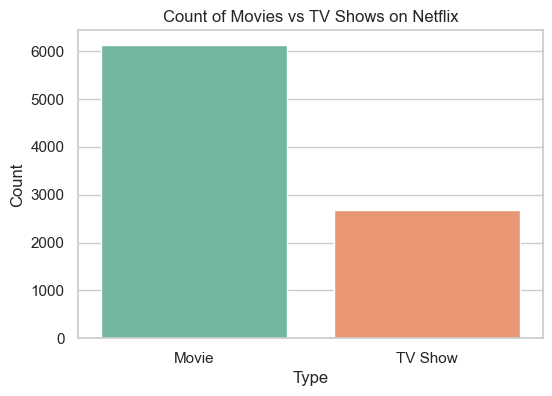

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type' , palette='Set2')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [40]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [41]:
df['year_added'] = df['date_added'].dt.year


In [43]:
df[['date_added', 'year_added']].head()
df_year = df.dropna(subset=['year_added'])

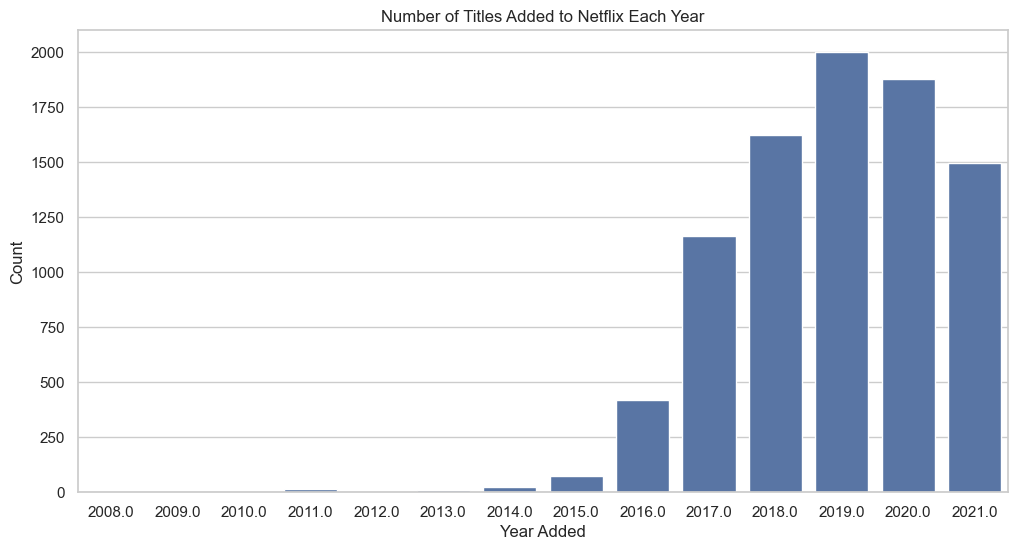

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_year, x='year_added')
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

In [49]:
df_genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_genres.name = 'genre'

In [55]:
genre_counts = df_genres.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

In [56]:
top10_genres = genre_counts.head(10)
top10_genres

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


C:\Users\hp\AppData\Local\Temp\ipykernel_20464\1583386569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='count', y='genre', palette='viridis')


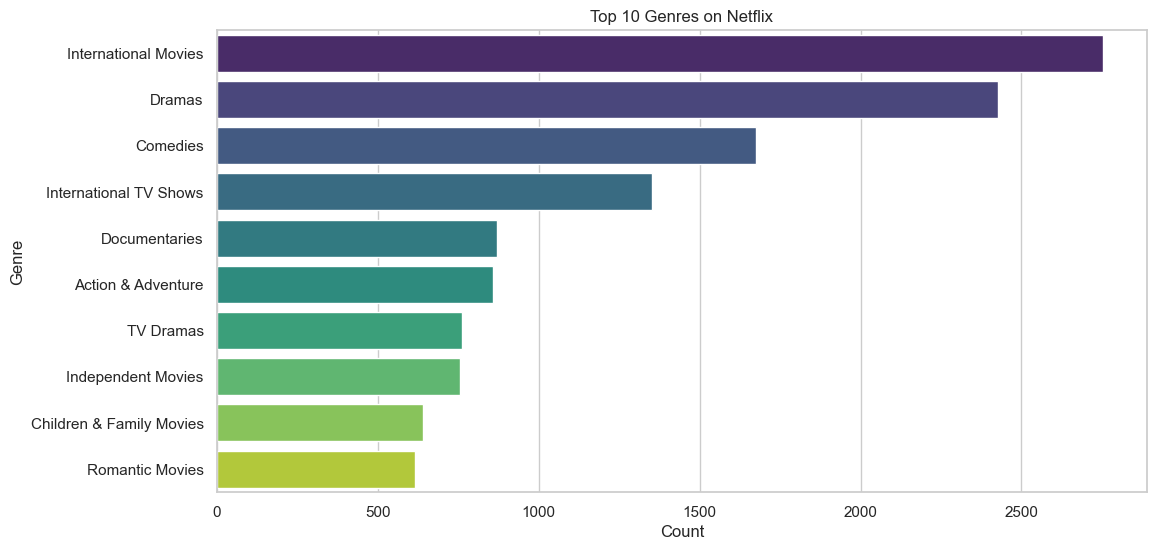

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_genres, x='count', y='genre', palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [27]:
df_countries = df['country'].str.split(', ', expand = True).stack().reset_index(level=1, drop=True)
df_countries.name = 'country'

In [28]:
country_counts = df_countries.value_counts().reset_index()
country_counts.columns = ['country', 'count']

In [29]:
top10_countries = country_counts.head(10)
top10_countries 

,country,count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


C:\Users\hp\AppData\Local\Temp\ipykernel_11720\1733334064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries, x='country', y='count', palette='magma')


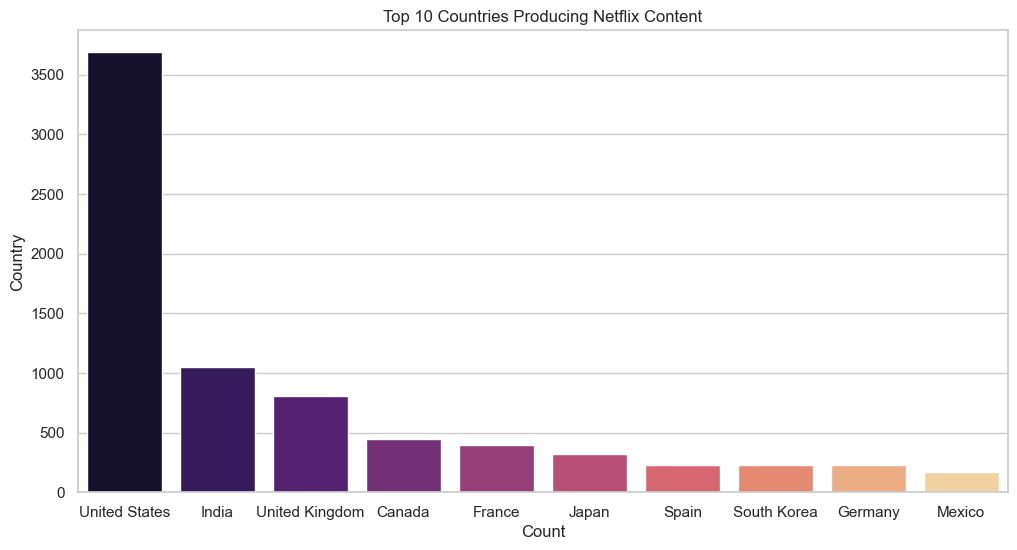

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_countries, x='country', y='count', palette='magma')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


In [7]:
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']
rating_counts

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


C:\Users\hp\AppData\Local\Temp\ipykernel_11720\2096143890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_counts, x='rating', y='count', palette= 'coolwarm')


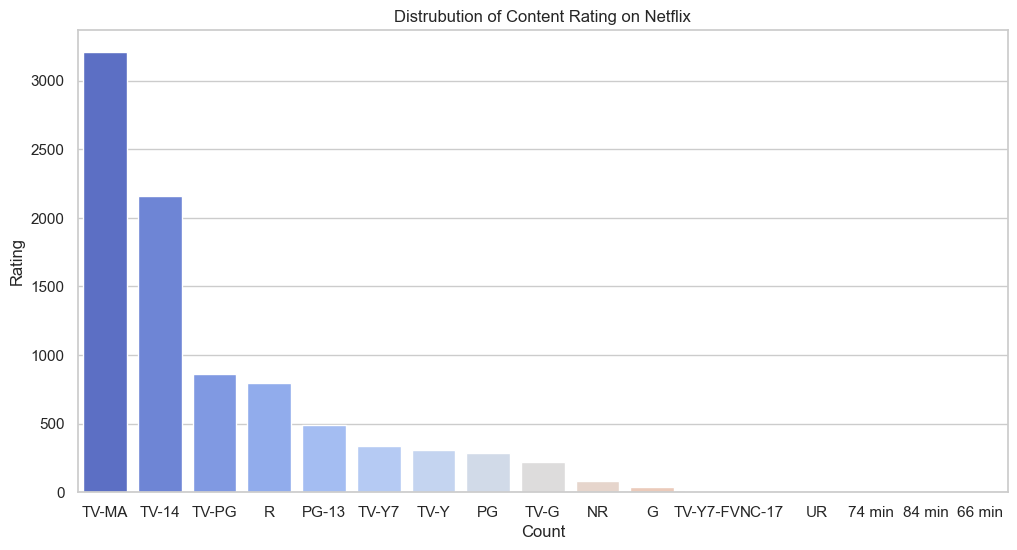

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=rating_counts, x='rating', y='count', palette= 'coolwarm')
plt.title("Distrubution of Content Rating on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [13]:
df_year = df.dropna(subset=['year_added'])

In [19]:
trend = df_year.groupby(['year_added', 'type']).size().reset_index(name='count')
trend

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,4
8,2014.0,Movie,19
9,2014.0,TV Show,4


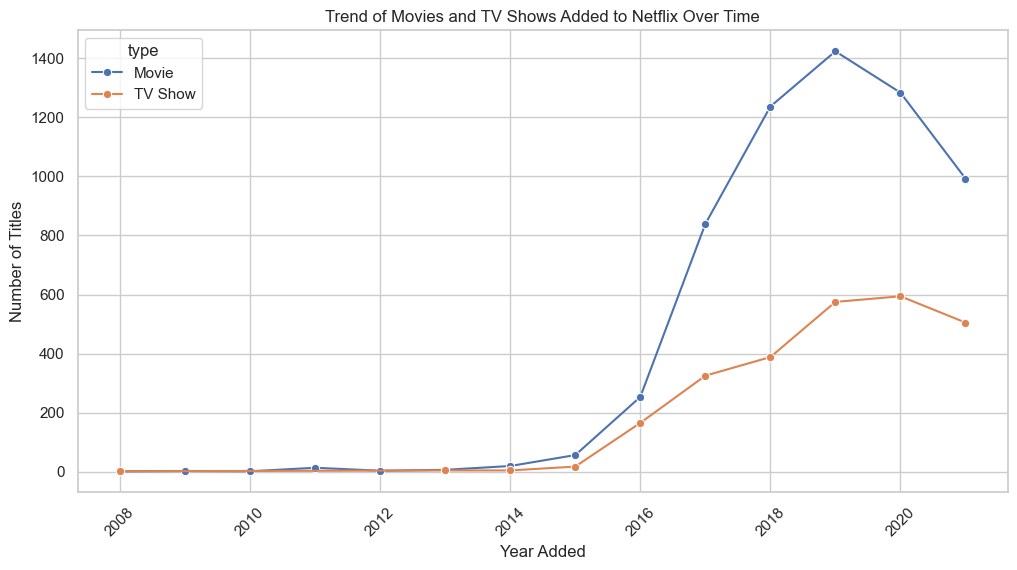

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x='year_added', y='count', hue='type', marker='o')
plt.title("Trend of Movies and TV Shows Added to Netflix Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# we have to types of viz lineplot and barplot
